In [1]:
%matplotlib inline

from sklearn.datasets import make_blobs, make_classification
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import numpy as np

plt.style.use('ggplot')
seed = 13

Let's generate some example data for a simple classification problem.

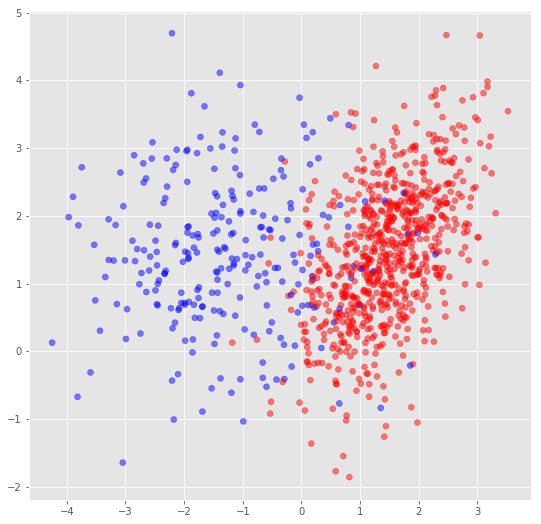

In [2]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                           n_redundant=0, n_classes=2, n_clusters_per_class=1, weights=[0.25,0.75],
                           hypercube=True, class_sep=1.4, random_state=seed)

plt.figure(figsize=(9,9))
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', alpha=0.5)
plt.show()

In [3]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

rsk = RepeatedStratifiedKFold(n_splits=5, n_repeats=1000, random_state=seed)
acc = []
for idx_train, idx_test in tqdm(rsk.split(X, y)):
    clf = LogisticRegression().fit(X[idx_train], y[idx_train])
    y_pred = clf.predict(X[idx_test])
    acc.append(np.mean(y[idx_test] == y_pred))
acc = np.array(acc)

5000it [00:03, 1436.34it/s]


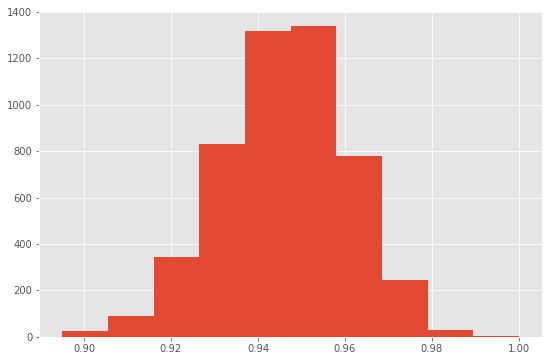

In [4]:
plt.figure(figsize=(9,6))
plt.hist(acc)#, bins=100, range=(0,1))
plt.show()

Label noise _completely at random_ (NCAR).

In [5]:
idx = np.random.uniform(size=y.shape) > 0.9

In [6]:
y_ncar = np.copy(y)
y_ncar[idx] = np.logical_not(y_ncar[idx]).astype(int)

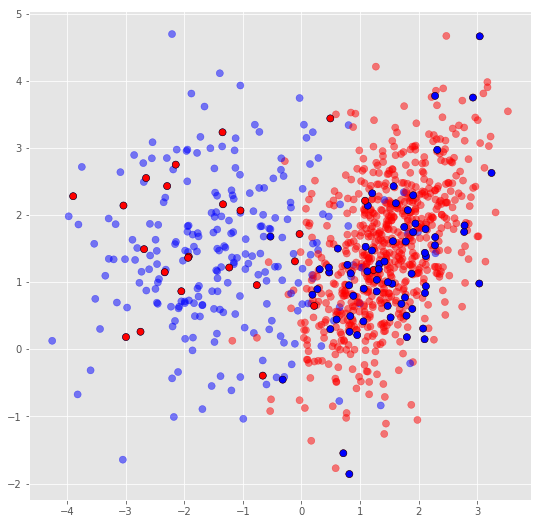

In [7]:
plt.figure(figsize=(9,9))
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', alpha=0.5, s=50)
plt.scatter(X[idx,0], X[idx,1], c=y_ncar[idx], cmap='bwr', s=50, edgecolors='black')
plt.show()

In [8]:
rsk = RepeatedStratifiedKFold(n_splits=5, n_repeats=1000, random_state=seed)
acc_ncar_0 = []
for idx_train, idx_test in tqdm(rsk.split(X, y_ncar)):
    clf = LogisticRegression().fit(X[idx_train], y_ncar[idx_train])
    y_pred = clf.predict(X[idx_test])
    acc_ncar_0.append(np.mean(y_ncar[idx_test] == y_pred))
acc_ncar_0 = np.array(acc_ncar_0)

5000it [00:03, 1569.62it/s]


In [9]:
rsk = RepeatedStratifiedKFold(n_splits=5, n_repeats=1000, random_state=seed)
acc_ncar_1 = []
for idx_train, idx_test in tqdm(rsk.split(X, y_ncar)):
    clf = LogisticRegression().fit(X[idx_train], y_ncar[idx_train])
    y_pred = clf.predict(X[idx_test])
    acc_ncar_1.append(np.mean(y[idx_test] == y_pred))
acc_ncar_1 = np.array(acc_ncar_1)

5000it [00:03, 1588.40it/s]


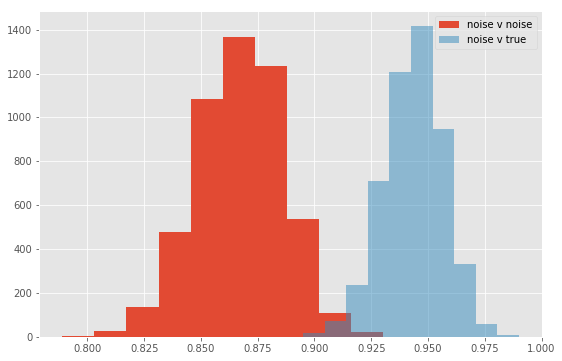

In [10]:
plt.figure(figsize=(9,6))
plt.hist(acc_ncar_0, label='noise v noise')
plt.hist(acc_ncar_1, label='noise v true', alpha=0.5)
plt.legend(loc='best')
plt.show()

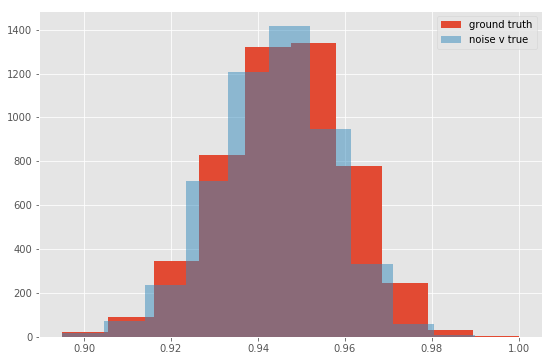

In [11]:
plt.figure(figsize=(9,6))
plt.hist(acc, label='ground truth')
plt.hist(acc_ncar_1, label='noise v true', alpha=0.5)
plt.legend(loc='best')
plt.show()

Label noise that occurs _at random_ (NAR).

In [12]:
thresh_0 = 0.70
thresh_1 = 0.90
probs = np.random.uniform(size=y.shape)
y_nar = []
for i, val in enumerate(y):
    if val == 0:
        if probs[i] > thresh_0:
            y_nar.append(1)
        else:
            y_nar.append(val)
    else:
        if probs[i] > thresh_1:
            y_nar.append(0)
        else:
            y_nar.append(val)
y_nar = np.array(y_nar)
idx = (y != y_nar)

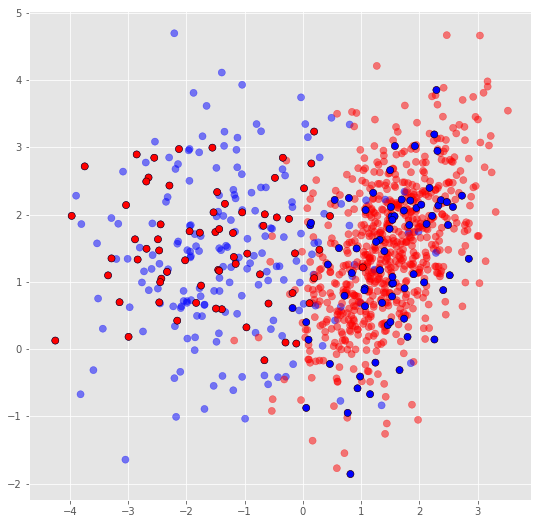

In [13]:
plt.figure(figsize=(9,9))
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', alpha=0.5, s=50)
plt.scatter(X[idx,0], X[idx,1], c=y_nar[idx], cmap='bwr', s=50, edgecolors='black')
plt.show()

In [14]:
rsk = RepeatedStratifiedKFold(n_splits=5, n_repeats=1000, random_state=seed)
acc_nar_0 = []
for idx_train, idx_test in tqdm(rsk.split(X, y_nar)):
    clf = LogisticRegression().fit(X[idx_train], y_nar[idx_train])
    y_pred = clf.predict(X[idx_test])
    acc_nar_0.append(np.mean(y_nar[idx_test] == y_pred))
acc_nar_0 = np.array(acc_nar_0)

5000it [00:03, 1566.83it/s]


In [15]:
rsk = RepeatedStratifiedKFold(n_splits=5, n_repeats=1000, random_state=seed)
acc_nar_1 = []
for idx_train, idx_test in tqdm(rsk.split(X, y_nar)):
    clf = LogisticRegression().fit(X[idx_train], y_nar[idx_train])
    y_pred = clf.predict(X[idx_test])
    acc_nar_1.append(np.mean(y[idx_test] == y_pred))
acc_nar_1 = np.array(acc_nar_1)

5000it [00:03, 1560.06it/s]


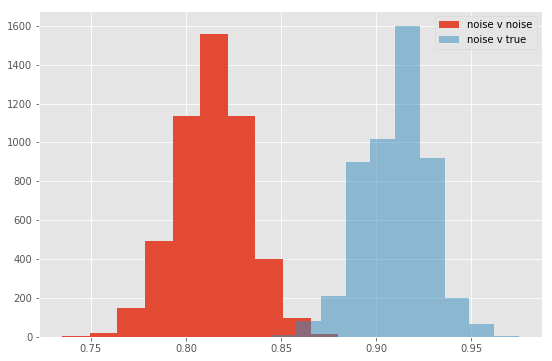

In [16]:
plt.figure(figsize=(9,6))
plt.hist(acc_nar_0, label='noise v noise')
plt.hist(acc_nar_1, label='noise v true', alpha=0.5)
plt.legend(loc='best')
plt.show()

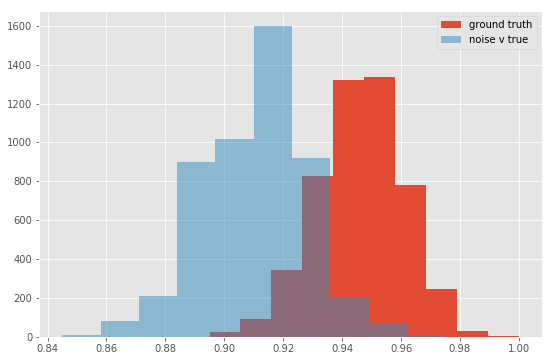

In [17]:
plt.figure(figsize=(9,6))
plt.hist(acc, label='ground truth')
plt.hist(acc_nar_1, label='noise v true', alpha=0.5)
plt.legend(loc='best')
plt.show()

Label noise _not at random_.

In [40]:
xx = []
for i in np.linspace(X.min(), X.max(), num=100):
    for j in np.linspace(X.min(), X.max(), num=100):
        xx.append([i,j])
xx = np.array(xx)

In [70]:
clf = LogisticRegression().fit(X,y)
y_prob_map = clf.predict_proba(xx)[:,1]

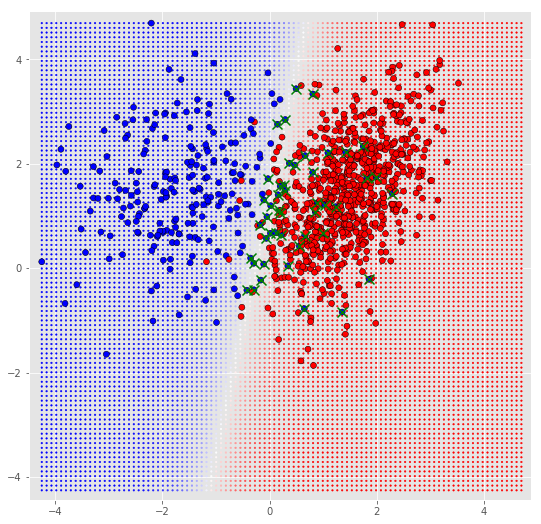

In [90]:
idx = (y_prob > 0.4) & (y == 0)

plt.figure(figsize=(9,9))
plt.scatter(xx[:,0], xx[:,1], c=y_prob_map, cmap='bwr', marker='.', s=10)
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', edgecolor='black')
plt.scatter(X[idx,0], X[idx,1], c='green', marker='x', s=100)
plt.margins(0.02)
plt.show()

In [112]:
y_nnar = np.copy(y)
idx = (y_prob > 0.4) & (y == 0)

for i, val in enumerate(y_nnar):
    if y_prob[i] > np.random.uniform():
        y_nnar[i] = 1

In [113]:
rsk = RepeatedStratifiedKFold(n_splits=5, n_repeats=1000, random_state=seed)
acc_nnar_0 = []
for idx_train, idx_test in tqdm(rsk.split(X, y_nar)):
    clf = LogisticRegression().fit(X[idx_train], y_nnar[idx_train])
    y_pred = clf.predict(X[idx_test])
    acc_nnar_0.append(np.mean(y_nnar[idx_test] == y_pred))
acc_nnar_0 = np.array(acc_nnar_0)

5000it [00:03, 1355.01it/s]


In [114]:
rsk = RepeatedStratifiedKFold(n_splits=5, n_repeats=1000, random_state=seed)
acc_nnar_1 = []
for idx_train, idx_test in tqdm(rsk.split(X, y_nnar)):
    clf = LogisticRegression().fit(X[idx_train], y_nnar[idx_train])
    y_pred = clf.predict(X[idx_test])
    acc_nnar_1.append(np.mean(y[idx_test] == y_pred))
acc_nnar_1 = np.array(acc_nnar_1)

5000it [00:03, 1360.06it/s]


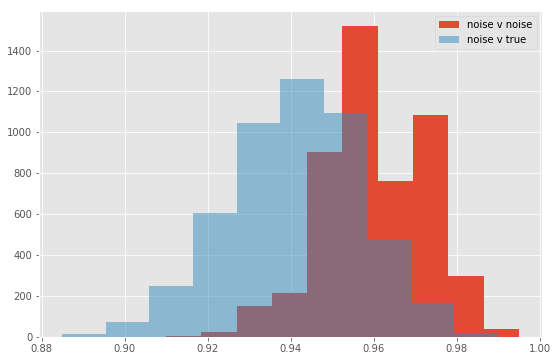

In [115]:
plt.figure(figsize=(9,6))
plt.hist(acc_nnar_0, label='noise v noise')
plt.hist(acc_nnar_1, label='noise v true', alpha=0.5)
plt.legend(loc='best')
plt.show()

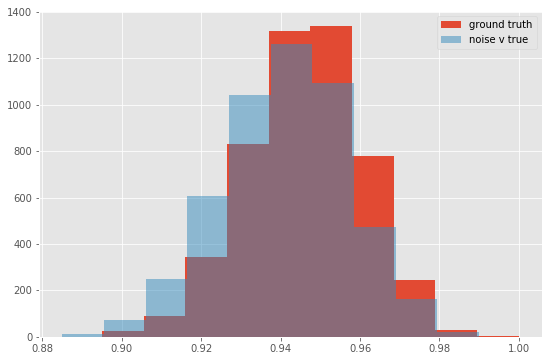

In [116]:
plt.figure(figsize=(9,6))
plt.hist(acc, label='ground truth')
plt.hist(acc_nnar_1, label='noise v true', alpha=0.5)
plt.legend(loc='best')
plt.show()